### TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

In [25]:
import numpy as np
import pandas as pd

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('blogs.csv')

In [31]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [33]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [35]:
df.shape

(2000, 2)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [39]:
#checking null values
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [41]:
#Data exploration
print("Categories:", df['Labels'].unique())

Categories: ['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']


In [43]:
print(df['Labels'].value_counts())

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


In [184]:
#Data preprocessing

In [47]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [48]:
import nltk

In [53]:
print(nltk.download('punkt'))
print(nltk.download('punkt_tab'))
print(nltk.download('stopwords'))

True
True
True


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [69]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [71]:
df['cleaned_text'] = df['Data'].apply(clean_text)

In [73]:
(df['cleaned_text'].head())

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism talkreli...
Name: cleaned_text, dtype: object

In [75]:
print(df.head())

                                                Data       Labels  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism   

                                        cleaned_text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


### Feature Extraction using TF-IDF

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
tf_idf_vectorizer = TfidfVectorizer()

In [84]:
tf_idf_vectorizer

TfidfVectorizer()

In [92]:
x = tf_idf_vectorizer.fit_transform(df['cleaned_text'])

In [96]:
print('Shape of the TF-IDF matrix:',x.shape)

Shape of the TF-IDF matrix: (2000, 46006)


## Naive Bayes Model for Text Classification

### Splitting the Data

In [100]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x, df['Labels'], test_size=0.2, random_state=42)

In [112]:
print('Shape of the training set:',x_train.shape)
print('Shape of the test set:',x_test.shape)

Shape of the training set: (1600, 46006)
Shape of the test set: (400, 46006)


### Implement a Naive Bayes classifier 

In [139]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [117]:
nb_classifier = MultinomialNB()

In [119]:
nb_classifier.fit(x_train,y_train)

MultinomialNB()

In [121]:
y_pred=nb_classifier.predict(x_test)

In [123]:
#Evaluate the model

accuracy = accuracy_score(y_test, y_pred)

In [125]:
precision = precision_score(y_test, y_pred, average='weighted')

In [127]:
recall = recall_score(y_test, y_pred, average='weighted')

In [129]:
f1 = f1_score(y_test, y_pred, average='weighted')

In [131]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.84
Precision: 0.8527566520817094
Recall: 0.84
F1-Score: 0.830431692757786


In [141]:
# Classification report for detailed metrics
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.70      0.88      0.78        16
                 sci.med       0.88      0.88      0.88        17
         

## Sentiment Analysis

In [144]:
!pip install textblob

In [146]:
from textblob import TextBlob

In [148]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [150]:
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

In [152]:
print(df[['Data', 'sentiment']].head())

                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


In [156]:
#Examine the distribution of sentiments across different categories and summarize your findings.

In [166]:
import matplotlib.pyplot as plt

In [168]:
sentiment_distribution = df.groupby(['Labels', 'sentiment']).size().unstack().fillna(0)

<Figure size 1400x700 with 0 Axes>

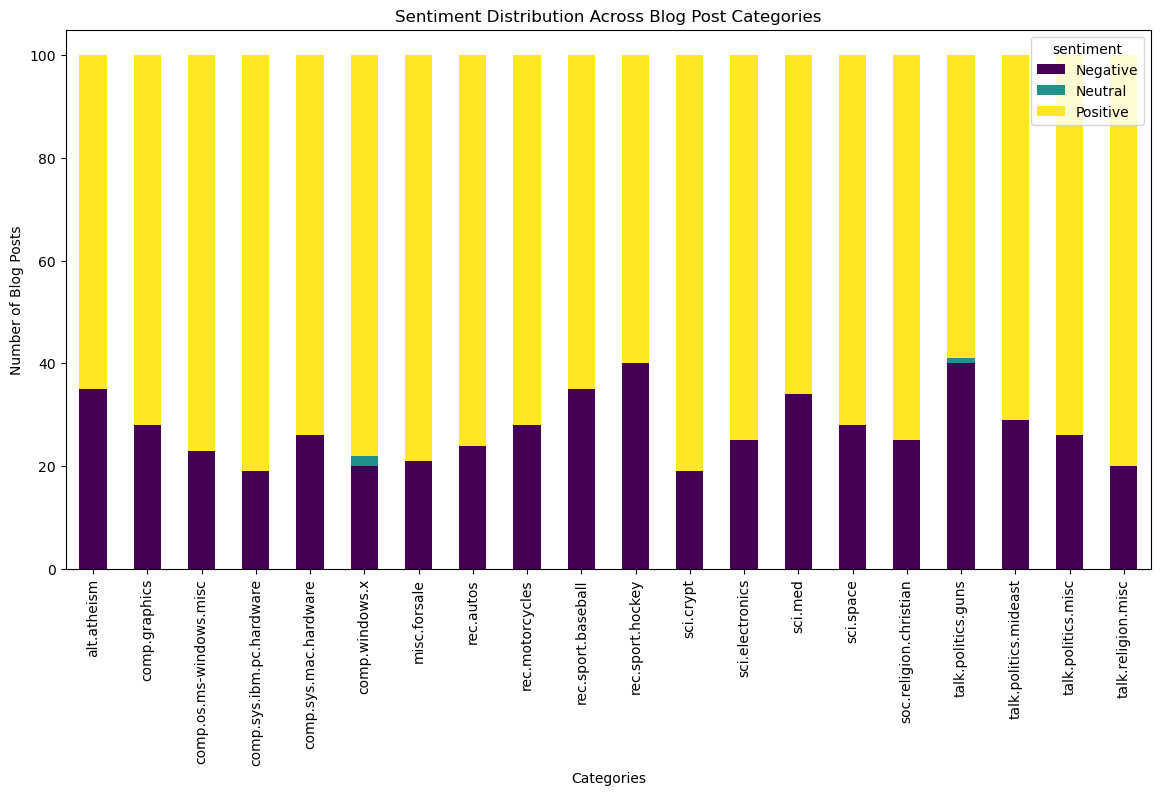

In [174]:
plt.figure(figsize=(14, 7))
sentiment_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 7))
plt.title('Sentiment Distribution Across Blog Post Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Blog Posts')
plt.xticks(rotation=90)
plt.show()

In [176]:
print(sentiment_distribution)

sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   35.0      0.0      65.0
comp.graphics                 28.0      0.0      72.0
comp.os.ms-windows.misc       23.0      0.0      77.0
comp.sys.ibm.pc.hardware      19.0      0.0      81.0
comp.sys.mac.hardware         26.0      0.0      74.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                  21.0      0.0      79.0
rec.autos                     24.0      0.0      76.0
rec.motorcycles               28.0      0.0      72.0
rec.sport.baseball            35.0      0.0      65.0
rec.sport.hockey              40.0      0.0      60.0
sci.crypt                     19.0      0.0      81.0
sci.electronics               25.0      0.0      75.0
sci.med                       34.0      0.0      66.0
sci.space                     28.0      0.0      72.0
soc.religion.christian        25.0      0.0      75.0
talk.politics.guns          

## Evaluation:

In [182]:
#Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.84
Precision: 0.8527566520817094
Recall: 0.84
F1-Score: 0.830431692757786


### Conclusion: